In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Plot stuff

### Pendulum

In [3]:
res = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.PendulumTest_res.csv')

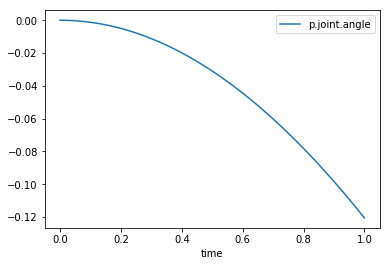

In [4]:
res[['time', 'p.joint.angle']].plot(x = 'time')

In [5]:
res[['time', 'p.joint.angle']].tail()

,time,p.joint.angle
97,0.97,-0.113623
98,0.98,-0.115894
99,0.99,-0.118184
100,1.00,-0.120494
101,1.00,-0.120494


### Single body rolling

In [6]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.SingleBodyRollingTest_res.csv')

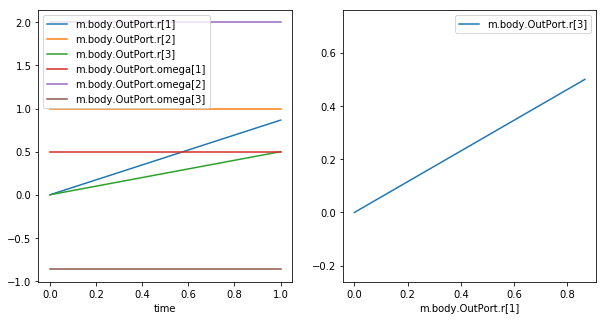

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

res[
    [ 'time'
    , 'm.body.OutPort.r[1]'
    , 'm.body.OutPort.r[2]'
    , 'm.body.OutPort.r[3]'
    , 'm.body.OutPort.omega[1]'
    , 'm.body.OutPort.omega[2]'
    , 'm.body.OutPort.omega[3]'
    ]
].plot(x = 'time', ax = ax1)

ax2.axis('equal')
res[
    [ 'm.body.OutPort.r[1]'
    , 'm.body.OutPort.r[3]'
    ]
].plot(x = 'm.body.OutPort.r[1]', ax = ax2)

### Single Roller Vertical Wheel

##### Cleanup

In [219]:
!rm /home/vf/om/models/omni/test/out/MbsLite.Test.SingleRollerOmniWheelTest*

#### Calc

In [277]:
res = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.SingleRollerOmniWheelTest_res.csv')

In [278]:
res.head()

,time,wheel.wheel.Contacts[1].relvn,wheel.wheel.Joints[1].angle,wheel.wheel.Joints[1].mu,wheel.wheel.Rollers[1].Active,wheel.wheel.Rollers[1].omega[1],wheel.wheel.Rollers[1].omega[2],wheel.wheel.Rollers[1].omega[3],wheel.wheel.Rollers[1].q[1],wheel.wheel.Rollers[1].q[2],...,wheel.wheel.Wheel.OutPort.epsilon[3],wheel.wheel.Wheel.OutPort.omega[1],wheel.wheel.Wheel.OutPort.omega[2],wheel.wheel.Wheel.OutPort.omega[3],wheel.wheel.Wheel.OutPort.r[1],wheel.wheel.Wheel.OutPort.r[2],wheel.wheel.Wheel.OutPort.r[3],wheel.wheel.Wheel.OutPort.v[1],wheel.wheel.Wheel.OutPort.v[2],wheel.wheel.Wheel.OutPort.v[3]
0,0.000,0.000000e+00,0.000000e+00,0.000000e+00,1,0.000000e+00,0.000000e+00,-20.000000,1.000000,0.000000e+00,...,3.086902e-09,0.000000e+00,0.000000e+00,-20.000000,0.000000,0.05,0.000000e+00,1.000000,0.000000e+00,0.000000e+00
1,0.001,-6.949088e-17,-5.008545e-15,-1.704782e-11,1,1.205862e-11,-2.914920e-14,-19.998834,0.999950,1.688751e-15,...,2.337010e+00,-4.861676e-12,1.280883e-13,-19.998834,0.001000,0.05,-3.090763e-17,0.999942,-5.187458e-09,-8.168277e-14
2,0.002,-6.751658e-17,-3.909914e-14,-4.281255e-11,1,3.121915e-11,-1.390358e-13,-19.995337,0.999800,1.404349e-14,...,4.662117e+00,-1.145206e-11,8.626461e-13,-19.995337,0.002000,0.05,-1.699615e-16,0.999767,-2.940035e-09,-1.676916e-13
3,0.003,-4.712043e-17,-7.815813e-14,-3.038399e-11,1,2.071999e-11,1.146332e-11,-19.989515,0.999550,2.811604e-14,...,6.967454e+00,-8.861028e-12,1.312251e-11,-19.989515,0.002999,0.05,-3.349924e-16,0.999476,-2.651359e-09,-1.682160e-13
4,0.004,-4.040650e-17,8.087414e-13,2.748377e-09,1,-2.464662e-09,2.483992e-09,-19.981375,0.999201,-3.565997e-13,...,9.290897e+00,4.613581e-10,2.439891e-09,-19.981375,0.003999,0.05,-1.461774e-15,0.999069,-2.602195e-09,-3.009971e-12


In [279]:
df = res[
    [ 'time'
    , 'wheel.wheel.OutPortK.T[1,1]'
    , 'wheel.wheel.OutPortK.T[1,2]'
    , 'wheel.wheel.OutPortK.T[1,3]'
    ]
]
df = df.assign(
    **{ 'wheel.selfRot' : df.apply(lambda row:
        ( np.arccos(row['wheel.wheel.OutPortK.T[1,1]'])
        if row['wheel.wheel.OutPortK.T[1,2]'] >= 0 else
#         np.arccos(row['wheel.wheel.OutPortK.T[1,1]'])
        2 * np.pi - np.arccos(row['wheel.wheel.OutPortK.T[1,1]'])
        ) * 180/np.pi
        , axis = 1
        )
      }
)
df.head()

,time,"wheel.wheel.OutPortK.T[1,1]","wheel.wheel.OutPortK.T[1,2]","wheel.wheel.OutPortK.T[1,3]",wheel.selfRot
0,0.000,1.000000,0.000000,0.000000e+00,0.000000
1,0.001,0.999800,0.019998,4.401696e-17,1.145893
2,0.002,0.999200,0.039986,6.033857e-16,2.291653
3,0.003,0.998201,0.059954,5.498082e-15,3.437146
4,0.004,0.996804,0.079890,9.337788e-13,4.582238


In [280]:
tmp = pd.DataFrame(
    { 'time'   : np.linspace(0, 4 * np.pi, 100)
    , 'cos'    : np.cos(np.linspace(0, 4 * np.pi, 100))
    , 'arccos' : np.arccos(np.cos(np.linspace(0, 4 * np.pi, 100)))
    }
)
tmp.head()

,arccos,cos,time
0,0.000000,1.000000,0.000000
1,0.126933,0.991955,0.126933
2,0.253866,0.967949,0.253866
3,0.380799,0.928368,0.380799
4,0.507732,0.873849,0.507732


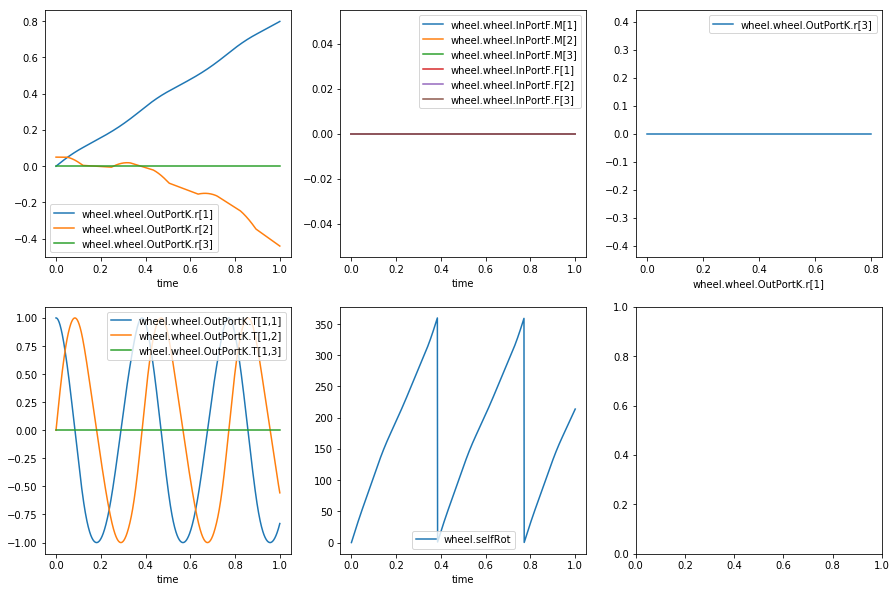

In [281]:
fig, axs = plt.subplots(2, 3, figsize = (15, 10))

res[
    [ 'time'
    , 'wheel.wheel.OutPortK.r[1]'
    , 'wheel.wheel.OutPortK.r[2]'
    , 'wheel.wheel.OutPortK.r[3]'
    ]
].plot(x = 'time', ax = axs[0][0])

res[
    [ 'time'
    , 'wheel.wheel.InPortF.M[1]'
    , 'wheel.wheel.InPortF.M[2]'
    , 'wheel.wheel.InPortF.M[3]'
    , 'wheel.wheel.InPortF.F[1]'
    , 'wheel.wheel.InPortF.F[2]'
    , 'wheel.wheel.InPortF.F[3]'
    ]
].plot(x = 'time', ax = axs[0][1])

axs[0][2].axis('equal')
res[
    [ 'wheel.wheel.OutPortK.r[1]'
    , 'wheel.wheel.OutPortK.r[3]'
    ]
].plot(x = 'wheel.wheel.OutPortK.r[1]', ax = axs[0][2])

res[
    [ 'time'
    , 'wheel.wheel.OutPortK.T[1,1]'
    , 'wheel.wheel.OutPortK.T[1,2]'
    , 'wheel.wheel.OutPortK.T[1,3]'
    ]
].plot(x = 'time', ax = axs[1][0])

df[
    [ 'time'
    , 'wheel.selfRot'
    ]
].plot(x = 'time', ax = axs[1][1])


In [282]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(res.iloc[0])

time                                             0.000000e+00
wheel.wheel.Contacts[1].relvn                    0.000000e+00
wheel.wheel.Joints[1].angle                      0.000000e+00
wheel.wheel.Joints[1].mu                         0.000000e+00
wheel.wheel.Rollers[1].Active                    1.000000e+00
wheel.wheel.Rollers[1].omega[1]                  0.000000e+00
wheel.wheel.Rollers[1].omega[2]                  0.000000e+00
wheel.wheel.Rollers[1].omega[3]                 -2.000000e+01
wheel.wheel.Rollers[1].q[1]                      1.000000e+00
wheel.wheel.Rollers[1].q[2]                      0.000000e+00
wheel.wheel.Rollers[1].q[3]                      0.000000e+00
wheel.wheel.Rollers[1].q[4]                      0.000000e+00
wheel.wheel.Rollers[1].r[1]                      0.000000e+00
wheel.wheel.Rollers[1].r[2]                      9.549150e-03
wheel.wheel.Rollers[1].r[3]                      0.000000e+00
wheel.wheel.Rollers[1].v[1]                      1.909830e-01
wheel.wh

In [266]:
R = 0.05
n = 5
k = 2 # starting from 1

vertical = np.array([ 0, 1 ])

alpha = np.pi / n
omega = 1 / R
R1 = R * np.cos(alpha)

wheel_center = R * vertical
roller_angle = 2 * alpha * (k - 1)
roller_center_rel = R1 * np.array([ np.sin(roller_angle), -np.cos(roller_angle) ])
roller_center = wheel_center + roller_center_rel
dist_to_roller_center = np.sqrt(sum(roller_center * roller_center))

roller_v = np.cross([ 0, 0, -omega ], [ roller_center[0], roller_center[1], 0 ])[:-1]
roller_v[1]

-0.7694208842938134

In [ ]:
wheel.wheel.Rollers[1].OutPort.v[1]              1.909830e-01
wheel.wheel.Rollers[1].OutPort.v[2]             -5.877853e-01
wheel.wheel.Rollers[1].OutPort.v[3]              0.000000e+00
wheel.wheel.Rollers[2].OutPort.v[1]              7.500000e-01
wheel.wheel.Rollers[2].OutPort.v[2]             -1.357206e+00
wheel.wheel.Rollers[2].OutPort.v[3]              0.000000e+00
wheel.wheel.Rollers[3].OutPort.v[1]              1.654508e+00
wheel.wheel.Rollers[3].OutPort.v[2]             -1.063314e+00
wheel.wheel.Rollers[3].OutPort.v[3]              0.000000e+00
wheel.wheel.Rollers[4].OutPort.v[1]              1.654508e+00
wheel.wheel.Rollers[4].OutPort.v[2]             -1.122570e-01
wheel.wheel.Rollers[4].OutPort.v[3]              0.000000e+00
wheel.wheel.Rollers[5].OutPort.v[1]              7.500000e-01
wheel.wheel.Rollers[5].OutPort.v[2]              1.816356e-01
wheel.wheel.Rollers[5].OutPort.v[3]              0.000000e+00

In [ ]:
wheel.wheel.Wheel.InPorts[2].F[1]                1.542000e-11
wheel.wheel.Wheel.InPorts[2].F[2]                2.624483e+00
wheel.wheel.Wheel.InPorts[2].F[3]               -7.922816e+28
wheel.wheel.Wheel.InPorts[3].F[1]                7.694209e-01
wheel.wheel.Wheel.InPorts[3].F[2]               -7.405000e-01
wheel.wheel.Wheel.InPorts[3].F[3]                7.922816e+29
wheel.wheel.Wheel.InPorts[4].F[1]                4.755283e-01
wheel.wheel.Wheel.InPorts[4].F[2]                1.640085e-01
wheel.wheel.Wheel.InPorts[4].F[3]                5.545971e+29
wheel.wheel.Wheel.InPorts[5].F[1]               -4.755283e-01
wheel.wheel.Wheel.InPorts[5].F[2]                1.640085e-01
wheel.wheel.Wheel.InPorts[5].F[3]               -4.357549e+29
wheel.wheel.Wheel.InPorts[6].F[1]               -7.694209e-01
wheel.wheel.Wheel.InPorts[6].F[2]               -7.405000e-01
wheel.wheel.Wheel.InPorts[6].F[3]               -7.922816e+29

In [270]:
sum([ 2.624483e+00
, -7.405000e-01
, 1.640085e-01
, 1.640085e-01
, -7.405000e-01
])

1.4715000000000003

### Vertical Wheel

In [52]:
res = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.OmniWheelTest_res.csv')

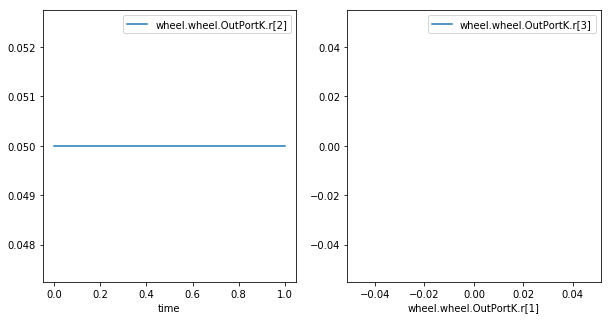

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

res[
    [ 'time'
    , 'wheel.wheel.OutPortK.r[2]'
    ]
].plot(x = 'time', ax = ax1)

ax2.axis('equal')
res[
    [ 'wheel.wheel.OutPortK.r[1]'
    , 'wheel.wheel.OutPortK.r[3]'
    ]
].plot(x = 'wheel.wheel.OutPortK.r[1]', ax = ax2)

# OM

In [ ]:
import OMPython
from OMPython import OMCSessionZMQ

In [ ]:
help(OMPython)

In [2]:
omc = OMCSessionZMQ()

2018-09-15 11:37:09,526 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.vf.port.0f9aeff4836b415db2f5d0b70a221f1d pid=22247


In [3]:
omc.sendExpression("cd()")

'/home/vf/om/models/omni'

In [7]:
omc.sendExpression('cd("tmp")')
omc.sendExpression("cd()")

'/home/vf/om/models/omni/tmp'

In [4]:
omc.sendExpression('loadModel(Modelica)')

True

In [5]:
root = '/home/vf/om/models/omni/thin/MBS'
path_MBS = root + '/package.mo'
path_MBS_Basics = root + '/Basics.mo'
paths = [
    path_MBS,
    path_MBS_Basics,
]
display(paths)

['/home/vf/om/models/omni/thin/MBS/package.mo',
 '/home/vf/om/models/omni/thin/MBS/Basics.mo']

In [12]:
omc.sendExpression('loadFile("' + path_MBS + '")')

False

In [ ]:
sim = omc.sendExpression('simulate(A, outputFormat="csv")')

In [ ]:
sim

In [ ]:
!mv {sim['resultFile']} .

In [ ]:
ls

In [ ]:
res = pd.read_csv('A_res.csv')

In [ ]:
res.hist()

In [ ]:
res['x'].plot()

In [ ]:
res['der(x)'].plot()